In [1]:
# basic import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sci-kit learn imports
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# regression imports
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn import metrics

In [2]:
#Dataset information
#https://rstudio-pubs-static.s3.amazonaws.com/857590_973bdb66c48841349b5d48df7dc3a514.html

# load the data
df = pd.read_csv("heart.csv")

In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
df.min()

Age                 28
Sex                  F
ChestPainType      ASY
RestingBP            0
Cholesterol          0
FastingBS            0
RestingECG         LVH
MaxHR               60
ExerciseAngina       N
Oldpeak           -2.6
ST_Slope          Down
HeartDisease         0
dtype: object

In [6]:
df.max()

Age                77
Sex                 M
ChestPainType      TA
RestingBP         200
Cholesterol       603
FastingBS           1
RestingECG         ST
MaxHR             202
ExerciseAngina      Y
Oldpeak           6.2
ST_Slope           Up
HeartDisease        1
dtype: object

In [7]:
#TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [8]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [9]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [10]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [11]:
# Replace string values into integers
# In integer values
# where ATA (Atypical Angina) = 0
# NAP (Non-Anginal Pain) = 1
# ASY (Asymptomatic) = 2
# TA (Typical Angina) = 3
df = df.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})

# Replace string values into integers
# In integer values where 
# Up = 0, Flat = 1 and Down = 2
df = df.replace({'Up': 0, 'Flat': 1, 'Down': 2})

# Replace string values into integers
# In integer values where
# Normal = 0, ST (having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))
# and LVH(showing probable or definite left ventricular hypertrophy by Estes’ criteria) = 2
df = df.replace({'Normal': 0, 'ST': 1, 'LVH': 2})

C:\Users\vilil\AppData\Local\Temp\ipykernel_25216\1749458802.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
C:\Users\vilil\AppData\Local\Temp\ipykernel_25216\1749458802.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Up': 0, 'Flat': 1, 'Down': 2})
C:\Users\vilil\AppData\Local\Temp\ipykernel_25216\1749458802.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, exp

In [12]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,0,140,289,0,0,172,N,0.0,0,0
1,49,F,1,160,180,0,0,156,N,1.0,1,1
2,37,M,0,130,283,0,1,98,N,0.0,0,0
3,48,F,2,138,214,0,0,108,Y,1.5,1,1
4,54,M,1,150,195,0,0,122,N,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,3,110,264,0,0,132,N,1.2,1,1
914,68,M,2,144,193,1,0,141,N,3.4,1,1
915,57,M,2,130,131,0,0,115,Y,1.2,1,1
916,57,F,0,130,236,0,2,174,N,0.0,1,1


In [13]:
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder to turn columns 'Sex' and 'ExerciseAngina' into
# numerical format where in 'Sex' 0 resembles male and
# 1 resembles female
# in 'ExerciseAngina' 0 equals to no exercise-induced angina
# and 1 equals to exercise-induced angina
variables = ['Sex', 'ExerciseAngina']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [14]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,0,132,0,1.2,1,1
914,68,1,2,144,193,1,0,141,0,3.4,1,1
915,57,1,2,130,131,0,0,115,1,1.2,1,1
916,57,0,0,130,236,0,2,174,0,0.0,1,1


In [15]:
# check for duplicates
df.duplicated().sum()

0

In [16]:
# check for missing values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [17]:
from scipy import stats

# Remove the furthest outliers that lie outside of
# - 3 and +3 out of standard deviation
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [18]:
# Drop column 'Training LevelTraining Level' from dataset
# and add it to y variable to become the target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

Train / test split

In [19]:
np.random.seed(943)

# Create train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=156)

Based on iterations, best k-value is this:
41


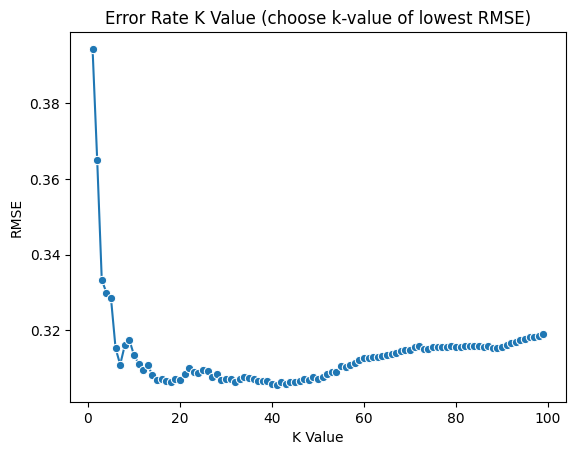

In [20]:
# adjust this to 50 or even 150 if you have lots of data rows
max_iterations = 100

# list to save the error values in the loop
error = []

# the default metric in scikit-learn
metric_selection = "minkowski"
weight_selection = "uniform"
algorithm_selection = "auto"

# Calculating error for K values between 1 and 40
for i in range(1, max_iterations):

    # try with current k-value, train the model and make a test prediction
    knn = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=i, 
                                                              metric=metric_selection, 
                                                              weights=weight_selection,
                                                              algorithm=algorithm_selection
                                                              ))
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    # save the error value for this k-value
    error.append(np.sqrt(metrics.mean_squared_error(y_test, pred_i)))
    
# plot all the k-values and their error values
sns.lineplot(x=range(1, max_iterations), y=error, marker='o')
plt.title('Error Rate K Value (choose k-value of lowest RMSE)')
plt.xlabel('K Value')
plt.ylabel('RMSE')

# choose best k-value based on metrics
# we have to add +1 to k-value, since argmin() returns an index
# which starts from 0, but k-values start from 1
print("Based on iterations, best k-value is this:")
k_value = np.argmin(error) + 1
print(k_value)

# build the model with the optimal values
model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k_value, 
                                                            metric=metric_selection, 
                                                            weights=weight_selection,
                                                            algorithm=algorithm_selection))
model.fit(X_train, y_train)

# fix the model variable name so 
# we can use the metrics as is
lm = model

In [21]:
# make test predictions with new data with our model
predictions = lm.predict(X_test)

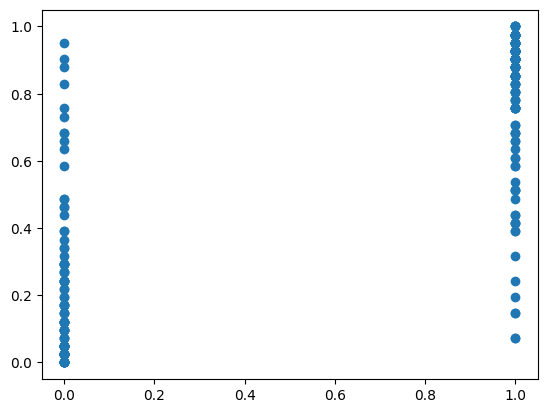

In [22]:
# Create scatterplot of deviation of people who have 
# heart disease
plt.scatter(y_test, predictions)
plt.show()

In [23]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,53.497219,0.789766,1.447164,132.027809,198.005562,0.232481,0.598443,136.917686,0.403782,0.861513,0.626251,0.547275
std,9.456073,0.407701,0.853553,17.120895,107.157779,0.422649,0.803693,25.356740,0.490928,1.007626,0.601057,0.498037
min,28.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,63.000000,0.000000,-2.000000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,174.500000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,2.000000,130.000000,222.000000,0.000000,0.000000,138.000000,0.000000,0.500000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,266.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,185.000000,518.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,1.000000


In [24]:
# Try new values to test model accuracy
tester_row = {
    'Age': 15,
    'Sex': 1,
    'ChestPainType': 0,
    'RestingBP': 130,
    'Cholesterol': 50,
    'FastingBS': 0,
    'RestingECG': 0,
    'MaxHR': 156,
    'ExerciseAngina': 0,
    'Oldpeak': -1,
    'ST_Slope': 0,
    #'HeartDisease': 0 
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [25]:
 # use our model to predict our tester_row data
result = lm.predict(tester_row)[0]

print()
print(f"Predicted possibility of heart disease for given person:")
print(f"{round(float(result), 2)} Posibility level")
print("----------------")

import math
lower_level = math.floor(result)
upper_level = math.ceil(result)

print(f"Posibility level is in range: {lower_level} - {upper_level}")


Predicted possibility of heart disease for given person:
0.02 Posibility level
----------------
Posibility level is in range: 0 - 1


In [26]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), " quality level")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "quality level^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "quality level")

# R-squared. 0 = the model describes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
0.21  quality level

MSE
0.09 quality level^2

RMSE:
0.31 quality level

R-squared:
0.62


C:\Users\vilil\AppData\Local\Temp\ipykernel_25216\1705253885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


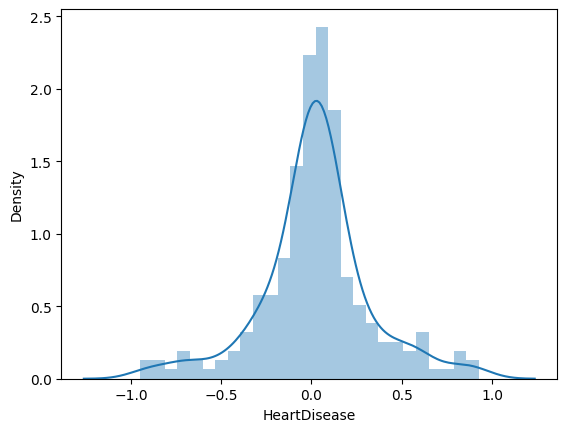

In [27]:
sns.distplot((y_test - predictions))
plt.show()
plt.close()